# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
tips = sns.load_dataset('tips')

In [14]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [15]:
# Criando a matriz de design (X) e a matriz y
y, X = patsy.dmatrices('tip ~ sex + smoker + size + total_bill', data=tips, return_type='dataframe')
X

,Intercept,sex[T.Female],smoker[T.No],size,total_bill
0,1.0,1.0,1.0,2.0,16.99
1,1.0,0.0,1.0,3.0,10.34
2,1.0,0.0,1.0,3.0,21.01
3,1.0,0.0,1.0,2.0,23.68
4,1.0,1.0,1.0,4.0,24.59
...,...,...,...,...,...
239,1.0,0.0,1.0,3.0,29.03
240,1.0,1.0,0.0,2.0,27.18
241,1.0,0.0,0.0,2.0,22.67
242,1.0,0.0,1.0,2.0,17.82


In [16]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     52.72
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           8.47e-32
Time:                        14:18:03   Log-Likelihood:                -347.78
No. Observations:                 244   AIC:                             705.6
Df Residuals:                     239   BIC:                             723.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6115      0.219      2.793

In [17]:
# Removendo as variáveis não significantes.
y, X = patsy.dmatrices('tip ~ size + total_bill', data=tips, return_type='dataframe')
X

,Intercept,size,total_bill
0,1.0,2.0,16.99
1,1.0,3.0,10.34
2,1.0,3.0,21.01
3,1.0,2.0,23.68
4,1.0,4.0,24.59
...,...,...,...
239,1.0,3.0,29.03
240,1.0,2.0,27.18
241,1.0,2.0,22.67
242,1.0,2.0,17.82


In [18]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           9.67e-34
Time:                        14:18:05   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

In [19]:
#Porque quando removo as variaveis não significaticas usando o pivelo abaixo de 5%, o R² reduz?

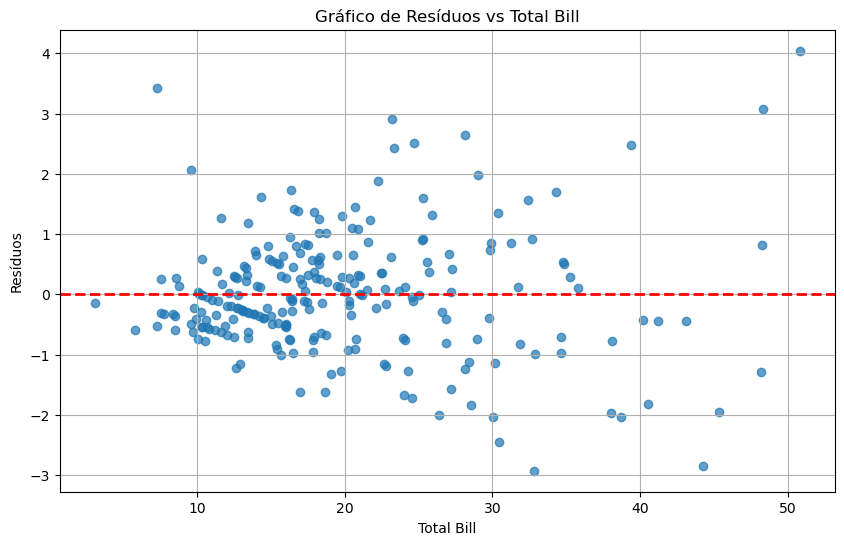

In [20]:
# Obtendo os resíduos
residuals = model.resid

# Obtendo os valores preditos
predicted_values = model.predict(X)

# Criando o gráfico de resíduos em função de total_bill
plt.figure(figsize=(10, 6))
plt.scatter(tips['total_bill'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Gráfico de Resíduos vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.grid()
plt.show()

In [21]:
# Transformação Logarítmica
formula_log = 'tip ~ size + np.log(total_bill)'
y_log, X_log = patsy.dmatrices(formula_log, data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

In [22]:
# Transformação Polinomial (quadrática e cúbica)
formula_poly = 'tip ~ size + total_bill + I(total_bill ** 2) + I(total_bill ** 3)'
y_poly, X_poly = patsy.dmatrices(formula_poly, data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

In [23]:
# Comparando os modelos
print("Modelo Logarítmico:")
print(model_log.summary())
print("\nModelo Polinomial:")
print(model_poly.summary())

Modelo Logarítmico:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     96.46
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.68e-31
Time:                        14:18:15   Log-Likelihood:                -353.21
No. Observations:                 244   AIC:                             712.4
Df Residuals:                     241   BIC:                             722.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [24]:
# Escolhendo o melhor modelo com base no AIC
aic_log = model_log.aic
aic_poly = model_poly.aic

print("\nAIC do Modelo Logarítmico:", aic_log)
print("AIC do Modelo Polinomial:", aic_poly)

if aic_log < aic_poly:
    print("\nO modelo logarítmico é melhor.")
else:
    print("\nO modelo polinomial é melhor.")


AIC do Modelo Logarítmico: 712.4108106715439
AIC do Modelo Polinomial: 697.2639339337006

O modelo polinomial é melhor.


Segundo AIC (Critério de Informação de Akaike) e o R² o melhor modelo é o polinomial!

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [25]:
# Criando a matriz de design (X) e a matriz y
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + size + total_bill', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  total_bill
          1              1             1     2       16.99
          1              0             1     3       10.34
          1              0             1     3       21.01
          1              0             1     2       23.68
          1              1             1     4       24.59
          1              0             1     4       25.29
          1              0             1     2        8.77
          1              0             1     4       26.88
          1              0             1     2       15.04
          1              0             1     2       14.78
          1              0             1     2       10.27
          1              1             1     4       35.26
          1              0             1     2       15.42
          1              0             1     4       18.43
          1              1             1     2       14.83
          1            

In [26]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     46.60
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           6.38e-29
Time:                        14:18:22   Log-Likelihood:                -72.922
No. Observations:                 244   AIC:                             155.8
Df Residuals:                     239   BIC:                             173.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2666      0.071      3.757

In [27]:
# Removendo as variáveis não significantes
y, X = patsy.dmatrices('np.log(tip) ~ size + total_bill', data=tips)
X

DesignMatrix with shape (244, 3)
  Intercept  size  total_bill
          1     2       16.99
          1     3       10.34
          1     3       21.01
          1     2       23.68
          1     4       24.59
          1     4       25.29
          1     2        8.77
          1     4       26.88
          1     2       15.04
          1     2       14.78
          1     2       10.27
          1     4       35.26
          1     2       15.42
          1     4       18.43
          1     2       14.83
          1     2       21.58
          1     3       10.33
          1     3       16.29
          1     3       16.97
          1     3       20.65
          1     2       17.92
          1     2       20.29
          1     2       15.77
          1     4       39.42
          1     2       19.82
          1     4       17.81
          1     2       13.37
          1     2       12.69
          1     2       21.70
          1     2       19.65
  [214 rows omitted]
  Terms:
    'In

In [28]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     93.65
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           8.08e-31
Time:                        14:18:25   Log-Likelihood:                -73.110
No. Observations:                 244   AIC:                             152.2
Df Residuals:                     241   BIC:                             162.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2858      0.063      4.555      0.0

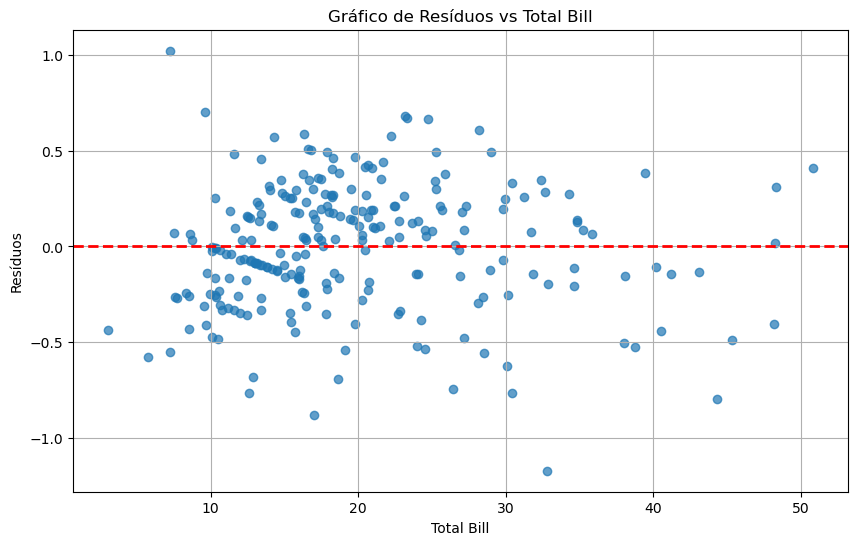

In [29]:
# Obtendo os resíduos
residuals = model.resid

# Obtendo os valores preditos
predicted_values = model.predict(X)

# Criando o gráfico de resíduos em função de total_bill
plt.figure(figsize=(10, 6))
plt.scatter(tips['total_bill'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Gráfico de Resíduos vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.grid()
plt.show()

In [30]:
# Criar a matriz de design e y para o modelo com log de total_bill
y_log, X_log = patsy.dmatrices('np.log(tip) ~ size + np.log(total_bill)', data=tips)
model_log = sm.OLS(y_log, X_log).fit()

In [31]:
# Criar a matriz de design e y para o modelo polinomial de total_bill
# Aqui vamos usar um polinômio de grau 2 como exemplo
y_poly, X_poly = patsy.dmatrices('np.log(tip) ~ size + total_bill + I(total_bill ** 2)', data=tips)
model_poly = sm.OLS(y_poly, X_poly).fit()

In [32]:
# Exibir resultados
print("Modelo com log de total_bill:")
print(model_log.summary())
print("\nModelo polinomial de total_bill:")
print(model_poly.summary())

Modelo com log de total_bill:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     107.6
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           4.00e-34
Time:                        14:18:30   Log-Likelihood:                -65.404
No. Observations:                 244   AIC:                             136.8
Df Residuals:                     241   BIC:                             147.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

In [33]:
# Escolhendo o melhor modelo com base no AIC
aic_log = model_log.aic
aic_poly = model_poly.aic

print("\nAIC do Modelo Logarítmico:", aic_log)
print("AIC do Modelo Polinomial:", aic_poly)

if aic_log < aic_poly:
    print("\nO modelo logarítmico é melhor.")
else:
    print("\nO modelo polinomial é melhor.")


AIC do Modelo Logarítmico: 136.80767136690736
AIC do Modelo Polinomial: 142.81834214787023

O modelo logarítmico é melhor.


Segundo AIC (Critério de Informação de Akaike) e o R² o melhor modelo é o logarítmico!

In [34]:
# Criar a matriz de design e y para o modelo com log de total_bill sem o log na tip
y_log, X_log = patsy.dmatrices('tip ~ size + np.log(total_bill)', data=tips)
model1 = sm.OLS(y_log, X_log).fit()

In [35]:
# Exibir resultados
print("Modelo com log de total_bill:")
print(model1.summary())

Modelo com log de total_bill:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     96.46
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.68e-31
Time:                        14:18:35   Log-Likelihood:                -353.21
No. Observations:                 244   AIC:                             712.4
Df Residuals:                     241   BIC:                             722.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

In [36]:
# Calcular o R² na escala original de tip 
# Para o modelo original (item 1)
r_squared_model1 = model1.rsquared
r_squared_model1

0.4446056122194971

In [37]:
O R² do item 1 é melhor que esse modelo.

SyntaxError: invalid character '²' (U+00B2) (3199713612.py, line 1)

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [38]:
df = pd.read_csv('previsao_de_renda.csv')

In [39]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [40]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [41]:
# Verificar se há valores nulos e removê-los
df = df.dropna(subset=['renda', 'tempo_emprego'])

# Definir a variável resposta e a variável explicativa
X = df['tempo_emprego']  # variável explicativa
y = df['renda']          # variável resposta

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:18:57   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

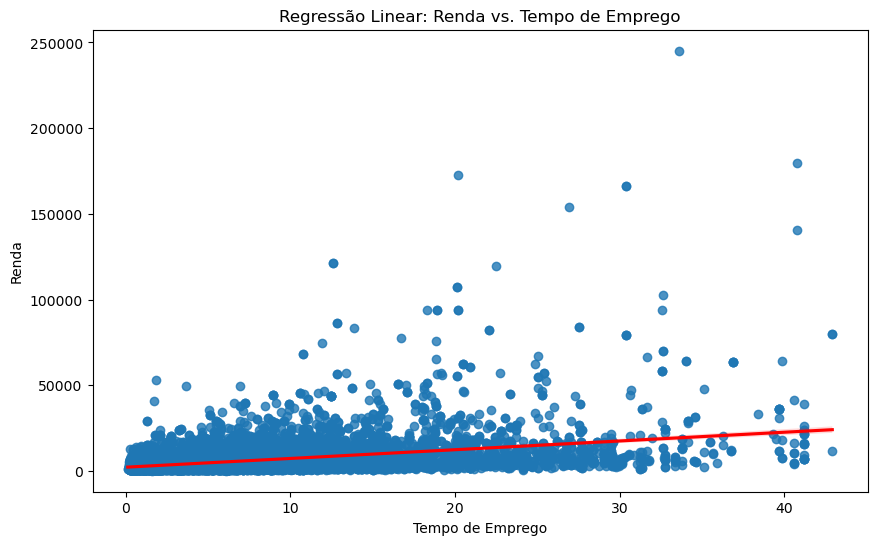

In [42]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
sns.regplot(x='tempo_emprego', y='renda', data=df, line_kws={'color': 'red'})
plt.title('Regressão Linear: Renda vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.show()

In [ ]:
# Cálculo dos resíduos
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

# Gráfico de resíduos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

# Gráfico QQ para verificar a normalidade dos resíduos
sm.qqplot(residuos, line='s')
plt.title('Gráfico QQ dos Resíduos')
plt.show()


In [52]:
# Definindo a fórmula com variáveis categóricas
formula = 'renda ~ C(sexo) + C(posse_de_imovel) + tempo_emprego'

# Criando a matriz de design (X) e a matriz y
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
X

,Intercept,C(sexo)[T.M],C(posse_de_imovel)[T.True],tempo_emprego
0,1.0,0.0,1.0,6.602740
1,1.0,1.0,1.0,7.183562
2,1.0,0.0,1.0,0.838356
3,1.0,0.0,1.0,4.846575
4,1.0,1.0,0.0,4.293151
...,...,...,...,...
14994,1.0,1.0,0.0,9.849315
14995,1.0,0.0,1.0,13.887671
14997,1.0,0.0,1.0,7.832877
14998,1.0,1.0,0.0,4.298630


In [53]:
# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1386.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:29:04   Log-Likelihood:            -1.2883e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12423   BIC:                         2.577e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [57]:
# Criar a matriz de design e y para o modelo polinomial de tempo_emprego
# Aqui vamos usar um polinômio de grau 2 como exemplo
y_poly, X_poly = patsy.dmatrices('np.log(renda) ~ C(sexo) + C(posse_de_imovel) + I(tempo_emprego ** 2)', data=df)
model_poly = sm.OLS(y_poly, X_poly).fit()

In [59]:
# Criar a matriz de design e y para o modelo com log de tempo_emprego
y_log, X_log = patsy.dmatrices('np.log(renda) ~ C(sexo) + C(posse_de_imovel) + np.log(tempo_emprego)', data=df)
model_log = sm.OLS(y_log, X_log).fit()

In [60]:
# Exibir resultados
print("Modelo com log de tempo_emprego:")
print(model_log.summary())
print("\nModelo polinomial de tempo_emprego:")
print(model_poly.summary())

Modelo com log de tempo_emprego:
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:38:55   Log-Likelihood:                -14093.
No. Observations:               12427   AIC:                         2.819e+04
Df Residuals:                   12423   BIC:                         2.822e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

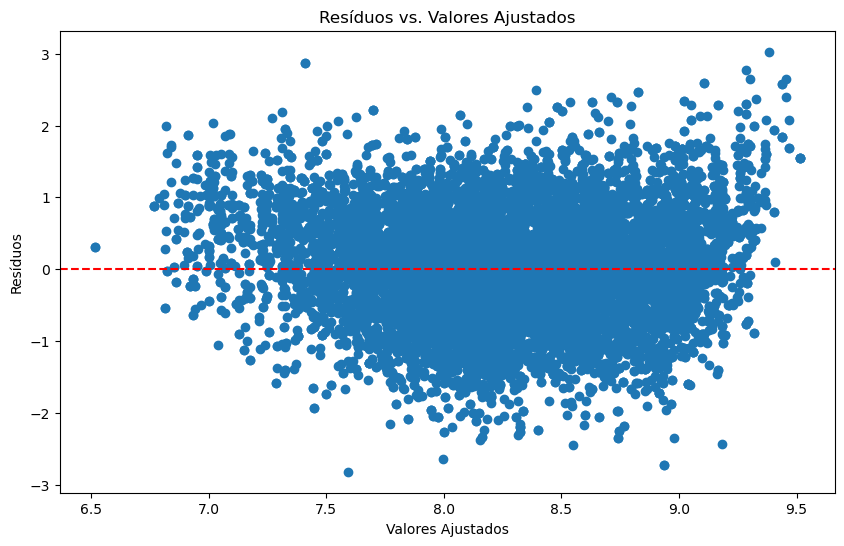

In [61]:
# Cálculo dos resíduos
residuos = model_log.resid
valores_ajustados = model_log.fittedvalues

# Gráfico de resíduos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

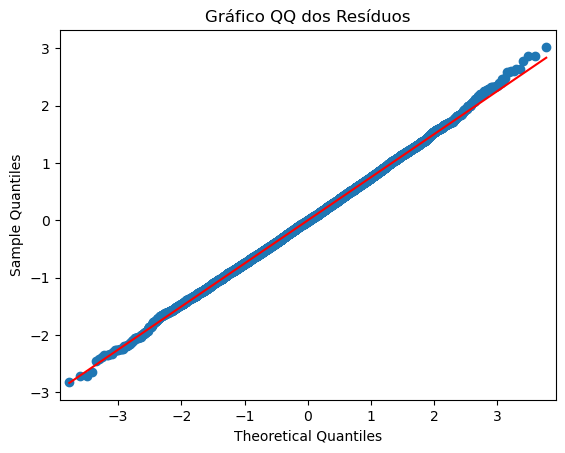

In [62]:
# Gráfico QQ para verificar a normalidade dos resíduos
sm.qqplot(residuos, line='s')
plt.title('Gráfico QQ dos Resíduos')
plt.show()

In [ ]:
O modelo model_log apresenta um R² superior aos demais modelos.